<a href="https://colab.research.google.com/github/Vusumuzi2Mabasa/BioHack2022/blob/main/Copy_of_V%26N_Biohack_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import files
uploaded = files.upload()

Saving TB.xlsx to TB (1).xlsx


In [51]:
import pandas as pd

df2 = pd.read_excel('TB.xlsx')
df2

,Class,canonical_smiles
0,Active,CC1=CC(=CC(=C1)CN2C(=O)C(=C(C=N2)Cl)Cl)C
1,Active,CC1=CC=CC=C1N2C3=C(C=N2)C(=CC(=C3)[N+](=O)[O-]...
2,Active,C1=CSC(=C1)C=C2C(=O)N(C(=S)S2)CCCC(=O)NC3=CC=C...
3,Active,CC1=CC=C(C=C1)CS(=O)(=O)C2=NC=C(C(=N2)C(=O)NC3...
4,Active,CC(C)C1=NN=C(S1)NC(=O)C2=NC(=NC=C2Cl)S(=O)(=O)...
...,...,...
125,Inactive,CN1C(=C(C(=O)N(C1=O)C)C2=NN(C(C2)C3=CC=CC=C3)C...
126,Inactive,CC1=C(SC=C1)C=NNC(=O)CC2=CC(=O)NN2
127,Inactive,C1=CC(=CC=C1C2=CC(=O)NN2)Br
128,Inactive,CC(=NNC(=O)CC1=CC(=O)NN1)C2=CC(=CC=C2)[N+](=O)...


In [52]:
df_class = df2.drop(columns='canonical_smiles')
df_class

,Class
0,Active
1,Active
2,Active
3,Active
4,Active
...,...
125,Inactive
126,Inactive
127,Inactive
128,Inactive


In [53]:
! pip install padelpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
! wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
! unzip fingerprints_xml.zip

--2022-08-17 08:37:06--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2022-08-17 08:37:06--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip.1’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2022-08-17 08:37:06 (96.4 MB/s) - ‘fingerprints_xml.zip.1’ saved [10871/10871]

Archive:  fingerprint

In [56]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [57]:
FP_list = ['AtomPairs2DCount',
           'AtomPairs2D',
           'EState',
           'CDKextended',
           'CDK',
           'CDKgraphonly',
           'KlekotaRothCount',
           'KlekotaRoth',
           'MACC',
           'Pubchem',
           'SubstructureCount',
           'Substructure']

In [58]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACC': 'MACCSFingerprinter.xml',
 'Pubchem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [59]:
selection = ['canonical_smiles','Class']
df3_selection = df2[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)


In [60]:
! cat molecule.smi | head -5

CC1=CC(=CC(=C1)CN2C(=O)C(=C(C=N2)Cl)Cl)C	Active
CC1=CC=CC=C1N2C3=C(C=N2)C(=CC(=C3)[N+](=O)[O-])[N+](=O)[O-]	Active
C1=CSC(=C1)C=C2C(=O)N(C(=S)S2)CCCC(=O)NC3=CC=C(C=C3)O	Active
CC1=CC=C(C=C1)CS(=O)(=O)C2=NC=C(C(=N2)C(=O)NC3=NN=C(S3)C(C)C)Cl	Active
CC(C)C1=NN=C(S1)NC(=O)C2=NC(=NC=C2Cl)S(=O)(=O)CC3=CC=C(C=C3)F	Active


In [90]:
from padelpy import padeldescriptor
fingerprint = 'AtomPairs2DCount'
Atom_output_file = ''.join([fingerprint, '.excel']) #'.csv'
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                  d_file=Atom_output_file,#'AtomPairs2Dcount.csv'
                  #descriptortypes='AtomFingerprint.xml'),
                  descriptortypes= fingerprint_descriptortypes,
                  detectaromaticity=True,
                  standardizenitro=True,
                  standardizetautomers=True,
                  threads=2,
                  removesalt=True,
                  log=True,
                  fingerprints=True)

In [91]:
Descriptors =pd.read_csv(Atom_output_file)
Descriptors

,Name,APC2D1_C_C,APC2D1_C_N,APC2D1_C_O,APC2D1_C_S,APC2D1_C_P,APC2D1_C_F,APC2D1_C_Cl,APC2D1_C_Br,APC2D1_C_I,...,APC2D10_I_I,APC2D10_I_B,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X
0,Active,12.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Active,14.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Active,15.0,5.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Active,14.0,8.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Active,13.0,8.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Inactive,18.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,Inactive,9.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,Inactive,9.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,Inactive,12.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
Atom = Descriptors.drop(columns='Name')
Atom

,APC2D1_C_C,APC2D1_C_N,APC2D1_C_O,APC2D1_C_S,APC2D1_C_P,APC2D1_C_F,APC2D1_C_Cl,APC2D1_C_Br,APC2D1_C_I,APC2D1_C_B,...,APC2D10_I_I,APC2D10_I_B,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X
0,12.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.0,5.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.0,8.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.0,8.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,18.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,9.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,9.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,12.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_combined = pd.concat([Atom, df_class], axis=1)
df_combined

# Machine Learning model in R

In [ ]:
!pip install rpy2

In [ ]:
!pip install ipython

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("tidyverse")


In [ ]:
%%R
install.packages("caret")


In [ ]:

%%R
install.packages("randomForest")


In [ ]:
%%R
install.packages("pROC")


In [ ]:
%%R
install.packages("ggpubr")

In [ ]:
%%R
library(tidyverse)
library(caret)
library(ggpubr)

library(randomForest)
library(pROC)

#Copying python dataframe to R

In [ ]:
%R -i df_combined
df_combined

In [191]:
%%R
df_combined[['Class']] <- as.factor(df_combined[['Class']])


In [ ]:
%%R
df_combined <- df_combined %>% select(where(~n_distinct(.)>1))
df_combined

In [192]:
%%R

TrainingIndex <- createDataPartition(df_combined[['Class']], p=0.8, list = F)
Trainingset <- df_combined[TrainingIndex,]
Testingset <- df_combined[-TrainingIndex,]

In [193]:
%%R
model.training <-randomForest(Class ~ ., data = Trainingset, ntree = 100, mtry = 4, importance = TRUE)

In [194]:
%%R
model.testing <- randomForest(Class ~ ., data = Testingset, ntree = 100, mtry = 4, importance = T )

In [195]:
%%R
model.cv <- randomForest(Class ~ ., data = Trainingset, ntree = 100, mtry = 4, importance = TRUE,trControl= trainControl(method = "cv",number = 10) )

In [196]:
%%R
model.training <- predict(model.training, Trainingset)


In [197]:
%%R
model.testing <- predict(model.testing, Testingset)


In [198]:
%%R
model.cv <- predict(model.cv, Trainingset)

In [199]:
%%R
model.training.confusion <- confusionMatrix(model.training, as.factor (Trainingset[['Class']]))


In [200]:
%%R
model.testing.confusion <- confusionMatrix(model.testing, as.factor(Testingset[['Class']]))

In [201]:
%%R
model.cv.confusion <- confusionMatrix(model.cv, as.factor (Trainingset[['Class']]))

In [202]:
%%R
print(model.training.confusion)

Confusion Matrix and Statistics

          Reference
Prediction Active Inactive
  Active       58        1
  Inactive      0       46
                                          
               Accuracy : 0.9905          
                 95% CI : (0.9481, 0.9998)
    No Information Rate : 0.5524          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9807          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9787          
         Pos Pred Value : 0.9831          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5524          
         Detection Rate : 0.5524          
   Detection Prevalence : 0.5619          
      Balanced Accuracy : 0.9894          
                                          
       'Positive' Class : Active          
      

In [203]:
%%R
print(model.testing.confusion)

Confusion Matrix and Statistics

          Reference
Prediction Active Inactive
  Active       14        0
  Inactive      0       11
                                     
               Accuracy : 1          
                 95% CI : (0.8628, 1)
    No Information Rate : 0.56       
    P-Value [Acc > NIR] : 5.066e-07  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.00       
            Specificity : 1.00       
         Pos Pred Value : 1.00       
         Neg Pred Value : 1.00       
             Prevalence : 0.56       
         Detection Rate : 0.56       
   Detection Prevalence : 0.56       
      Balanced Accuracy : 1.00       
                                     
       'Positive' Class : Active     
                                     


In [204]:
%%R
print(model.cv.confusion)

Confusion Matrix and Statistics

          Reference
Prediction Active Inactive
  Active       58        0
  Inactive      0       47
                                     
               Accuracy : 1          
                 95% CI : (0.9655, 1)
    No Information Rate : 0.5524     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5524     
         Detection Rate : 0.5524     
   Detection Prevalence : 0.5524     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : Active     
                                     


Area under the curve: 1


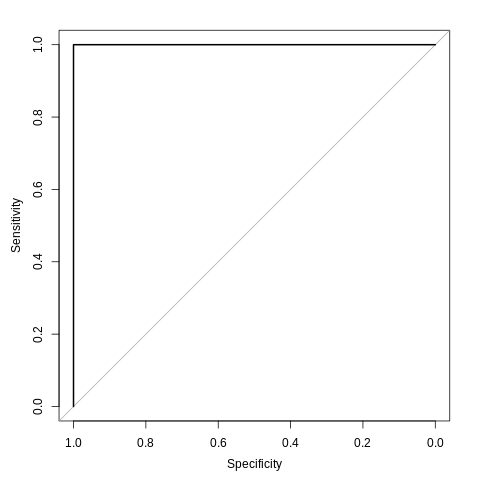

In [205]:
%%R
auc(Testingset[["Class"]], predictor= factor(model.testing, ordered= T), plot=T)

#Machine Learning in Python
  

In [177]:
X = df_combined.drop('Class', axis=1)
X

,APC2D1_C_C,APC2D1_C_N,APC2D1_C_O,APC2D1_C_S,APC2D1_C_P,APC2D1_C_F,APC2D1_C_Cl,APC2D1_C_Br,APC2D1_C_I,APC2D1_C_B,...,APC2D10_I_I,APC2D10_I_B,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X
0,12.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.0,5.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.0,8.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.0,8.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,18.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,9.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,9.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,12.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
Y = df_combined.Class
Y


0        Active
1        Active
2        Active
3        Active
4        Active
         ...   
125    Inactive
126    Inactive
127    Inactive
128    Inactive
129    Inactive
Name: Class, Length: 130, dtype: object

In [179]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)


In [182]:
X.shape

(130, 139)

In [183]:
X

array([[12.,  3.,  1., ...,  0.,  0.,  0.],
       [14.,  5.,  0., ...,  0.,  0.,  0.],
       [15.,  5.,  3., ...,  0.,  0.,  1.],
       ...,
       [ 9.,  4.,  2., ...,  0.,  0.,  0.],
       [12.,  5.,  2., ...,  0.,  0.,  0.],
       [14.,  9.,  3., ...,  0.,  0.,  3.]])

In [184]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [185]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [186]:
X_train.shape, Y_train.shape


((104, 139), (104,))

In [187]:
X_test.shape, Y_test.shape


((26, 139), (26,))

In [103]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt


In [ ]:
kf = KFold(n_splits=5)
np.random.seed(100)
for train_index, test_index in kf.split(X):
  print("Train:", train_index, "Validation:", test_index)
  X_train, X_test= X[train_index], X[test_index]
  Y_train, Y_test= Y[train_index], Y[test_index]


In [188]:
#np.random.seed(100)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.8461538461538461

In [ ]:
df_combined.to_csv('TB_cytotoxicity.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

In [ ]:
! mkdir '/content/gdrive/My Drive/Colab Notebooks/dataTB'

In [ ]:
! cp TB_cytotoxicity.csv '/content/gdrive/My Drive/Colab Notebooks/dataTB'

In [ ]:
! ls -l '/content/gdrive/My Drive/Colab Notebooks/dataTB'